## 추론(예측) 기반 기법과 신경망

## word2vec : 워드투벡터
2013년 구글의 토마스미콜로프(Tomas Mikolov)의 팀이 개발<br>
<b>word2vec</b> 알고리즘은 <b>신경망 모델</b>을 사용 하여 큰 텍스트 코퍼스에서 단어 연관성을 학습. 학습이 끝나면 이러한 모델은 동의어 단어를 감지하거나 부분 문장에 대한 추가 단어를 제안 할 수 있다. word2vec는 <b>벡터</b> 라고하는 특정 숫자 목록을 사용하여 각각의 고유 한 단어를 나타낸다 . 벡터는 간단한 수학적 함수 ( 벡터 간의 코사인 유사성 ) 가 해당 벡터가 나타내는 단어 간의 의미 유사성 수준을 나타내 도록 신중하게 선택 된다.

## [1] 신경망에서의 단어 처리

In [1]:
import numpy as np

text = 'You say goodbye and I say hello.'
# {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

# 여기서 'you'만  one-hot 인코딩으로 표현
c = np.array([[1,0,0,0,0,0,0]])   # (1,7)
print('c:\n',c)

W = np.random.randn(7,3)
print('W:\n',W)

h = np.matmul(c,W)    # (1,7) * (7,3) = (1,3)
print('h:\n',h)

c:
 [[1 0 0 0 0 0 0]]
W:
 [[-0.64125118  1.80274542 -0.10387726]
 [ 0.10022938  0.40665351  0.17875834]
 [-0.49784913  1.94699703 -2.19991927]
 [-0.03200709 -1.58536604  0.49022741]
 [-0.68498818  1.42713567  0.21711963]
 [-1.07724632 -0.10747004 -0.28142072]
 [-0.44870259 -1.41648455  0.19463407]]
h:
 [[-0.64125118  1.80274542 -0.10387726]]


## [2] 단순한 word2vec

### CBOW (Continuous Bag of Words) 모델

#### Word2Vec에는 CBOW(Continuous Bag of Words)와 Skip-Gram 두 가지 방식이 있다
- $ CBOW $ 는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법 <br>
  타깃(target)은 중앙 단어 그 주변 단어들이 맥락(contexts)이다
- $ Skip-Gram $ 은 중간에 있는 단어로 주변 단어들을 예측하는 방법

#### BOW(Bag of Words) : 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법

BOW를 만드는 과정<br>
(1) 우선, 각 단어의 고유한 인덱스(Index)를 부여한다.<br>
(2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터(Vector)를 만든다.<br>

"정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."<br>
('정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9) <br>
BOW: [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]  ==> '가' 와 '물가상승률' 은 2회 발생

https://wikidocs.net/22650

### 학습 데이터 준비
#### 맥락과 타깃을 생성

In [2]:
from mynlp import preprocess, create_contexts_target,convert_one_hot

In [3]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)      # 8개
print(id_to_word)  # 7개
print(word_to_id)  # 7개

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}


In [4]:
contexts,target = create_contexts_target(corpus,window_size=1)
print(contexts,contexts.shape)
# 맥락(contexts) : 예측할 단어의 주변 단어
# {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
# window_size=1 일 경우 : 주변 단어를 중간 단어에 앞,뒤로 1개만 사용
# [[0 2]   : 'you', 'goodbye'
#  [1 3]   : 'say', 'and'
#  [2 4]   : 'goodbye', 'i'
#  [3 1]   : 'and', 'say'
#  [4 5]   : 'i', 'hello'
#  [1 6]]  : 'say', '.'

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]] (6, 2)


In [5]:
print(target)   # (6,)

[1 2 3 4 1 5]


In [6]:
vocab_size = len(word_to_id)
print(vocab_size)
target = convert_one_hot(target,vocab_size)
print(target,target.shape)  # (6,7)

7
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]] (6, 7)


In [7]:
contexts = convert_one_hot(contexts,vocab_size)
print(contexts,contexts.shape)  # (6,2,7)

[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]] (6, 2, 7)


### CBOW 신경망 모델 구현

In [8]:
from nn_layers import MatMul,SoftmaxWithLoss,Adam

In [9]:
class SimpleCBOW:
    def __init__(self,vocab_size,hidden_size):  # 어휘수 : 7개, 은닉층의 뉴런 : 5
        V, H = vocab_size, hidden_size
        
        # 가중치 초기화
        W_in = 0.01*np.random.randn(V,H).astype('f')  # (7,5)
        W_out = 0.01*np.random.randn(H,V).astype('f') # (5,7)
        
        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기를 리스트에 모은다
        layers = [self.in_layer0,self.in_layer1,self.out_layer]
        self.params, self.grads = [],[]
        for layer in layers: # 3회
            self.params += layer.params
            self.grads += layer.grads
       
        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vec = W_in     
        
    def predict(self,contexts) :  # contexts : (6,2,7)  
        h0 = self.in_layer0.forward(contexts[:,0,:])  # (6,7), , 맥락의 첫번째 단어 
        h1 = self.in_layer1.forward(contexts[:,1,:])  # (6,7), , 맥락의 두번째 단어 
        
        h = (h0 + h1) * 0.5    # 평균
        
        score = self.out_layer.forward(h)
        return self.loss_layer.softmax(score) # softmax()함수로 확률값으로 출력
    
    def forward(self,contexts,target): # contexts : (6,2,7), target : (6,7)
        h0 = self.in_layer0.forward(contexts[:,0,:])  # (6,7), , 맥락의 첫번째 단어 
        h1 = self.in_layer1.forward(contexts[:,1,:])  # (6,7), , 맥락의 두번째 단어 
        
        h = (h0 + h1) * 0.5   # 평균
        
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score,target)
        return loss
    
    def backward(self,dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer0.backward(da)
        self.in_layer1.backward(da)
        return None

### Trainer 클래스

In [10]:
import time

def remove_duplicate(params, grads):
    '''
    매개변수의 중복 제거 함수
    매개변수 배열 중 중복되는 가중치를 하나로 모아
    그 가중치에 대응하는 기울기를 더한다.
    '''
    params, grads = params[:], grads[:]  # copy list

    while True:
        find_flg = False
        L = len(params)

        for i in range(0, L - 1):
            for j in range(i + 1, L):
                # 가중치 공유 시
                if params[i] is params[j]:
                    grads[i] += grads[j]  # 경사를 더함
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)
                # 가중치를 전치행렬로 공유하는 경우(weight tying)
                elif params[i].ndim == 2 and params[j].ndim == 2 and \
                     params[i].T.shape == params[j].shape and np.all(params[i].T == params[j]):
                    grads[i] += grads[j].T
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)

                if find_flg: break
            if find_flg: break

        if not find_flg: break

    return params, grads

class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.loss_list = []
        self.eval_interval = None
        self.current_epoch = 0

    def fit(self, x, t, max_epoch=10, batch_size=32, max_grad=None, eval_interval=20):
        data_size = len(x)
        max_iters = data_size // batch_size
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            # 뒤섞기
            idx = np.random.permutation(np.arange(data_size))
            x = x[idx]
            t = t[idx]

            for iters in range(max_iters):
                batch_x = x[iters*batch_size:(iters+1)*batch_size]
                batch_t = t[iters*batch_size:(iters+1)*batch_size]

                # 기울기 구해 매개변수 갱신
                loss = model.forward(batch_x, batch_t)
                model.backward()
                
                params, grads = remove_duplicate(model.params, model.grads)  # 공유된 가중치를 하나로 모음
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 평가
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    avg_loss = total_loss / loss_count
                    elapsed_time = time.time() - start_time
                    print('| 에폭 %d |  반복 %d / %d | 시간 %d[s] | 손실 %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, avg_loss))
                    self.loss_list.append(float(avg_loss))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = np.arange(len(self.loss_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.loss_list, label='train')
        plt.xlabel('반복 (x' + str(self.eval_interval) + ')')
        plt.ylabel('손실')
        plt.show()   

In [11]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)  # 7
contexts,target = create_contexts_target(corpus,window_size)

target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

print(contexts,contexts.shape)  # (6, 2, 7)
print(target,target.shape)  # (6,7)

[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]] (6, 2, 7)
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]] (6, 7)


In [12]:
# 학습
model = SimpleCBOW(vocab_size,hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts,target,max_epoch,batch_size)

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.93
| 에폭 26 |

| 에폭 217 |  반복 1 / 2 | 시간 0[s] | 손실 1.13
| 에폭 218 |  반복 1 / 2 | 시간 0[s] | 손실 1.25
| 에폭 219 |  반복 1 / 2 | 시간 0[s] | 손실 1.19
| 에폭 220 |  반복 1 / 2 | 시간 0[s] | 손실 1.24
| 에폭 221 |  반복 1 / 2 | 시간 0[s] | 손실 1.17
| 에폭 222 |  반복 1 / 2 | 시간 0[s] | 손실 1.17
| 에폭 223 |  반복 1 / 2 | 시간 0[s] | 손실 1.17
| 에폭 224 |  반복 1 / 2 | 시간 0[s] | 손실 1.11
| 에폭 225 |  반복 1 / 2 | 시간 0[s] | 손실 1.17
| 에폭 226 |  반복 1 / 2 | 시간 0[s] | 손실 1.16
| 에폭 227 |  반복 1 / 2 | 시간 0[s] | 손실 1.15
| 에폭 228 |  반복 1 / 2 | 시간 0[s] | 손실 1.22
| 에폭 229 |  반복 1 / 2 | 시간 0[s] | 손실 1.10
| 에폭 230 |  반복 1 / 2 | 시간 0[s] | 손실 1.15
| 에폭 231 |  반복 1 / 2 | 시간 0[s] | 손실 1.15
| 에폭 232 |  반복 1 / 2 | 시간 0[s] | 손실 1.15
| 에폭 233 |  반복 1 / 2 | 시간 0[s] | 손실 1.20
| 에폭 234 |  반복 1 / 2 | 시간 0[s] | 손실 1.08
| 에폭 235 |  반복 1 / 2 | 시간 0[s] | 손실 1.14
| 에폭 236 |  반복 1 / 2 | 시간 0[s] | 손실 1.21
| 에폭 237 |  반복 1 / 2 | 시간 0[s] | 손실 1.06
| 에폭 238 |  반복 1 / 2 | 시간 0[s] | 손실 1.13
| 에폭 239 |  반복 1 / 2 | 시간 0[s] | 손실 1.13
| 에폭 240 |  반복 1 / 2 | 시간 0[s] | 손실 1.13
| 에폭 241 |  반복 1

| 에폭 447 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 448 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 449 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 450 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 451 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 452 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 453 |  반복 1 / 2 | 시간 0[s] | 손실 0.82
| 에폭 454 |  반복 1 / 2 | 시간 0[s] | 손실 0.77
| 에폭 455 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 456 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 457 |  반복 1 / 2 | 시간 0[s] | 손실 0.68
| 에폭 458 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 459 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 460 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 461 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 462 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 463 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 464 |  반복 1 / 2 | 시간 0[s] | 손실 0.72
| 에폭 465 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 466 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 467 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 468 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 469 |  반복 1 / 2 | 시간 0[s] | 손실 0.78
| 에폭 470 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 471 |  반복 1

| 에폭 739 |  반복 1 / 2 | 시간 1[s] | 손실 0.57
| 에폭 740 |  반복 1 / 2 | 시간 1[s] | 손실 0.58
| 에폭 741 |  반복 1 / 2 | 시간 1[s] | 손실 0.81
| 에폭 742 |  반복 1 / 2 | 시간 1[s] | 손실 0.57
| 에폭 743 |  반복 1 / 2 | 시간 1[s] | 손실 0.70
| 에폭 744 |  반복 1 / 2 | 시간 1[s] | 손실 0.40
| 에폭 745 |  반복 1 / 2 | 시간 1[s] | 손실 0.64
| 에폭 746 |  반복 1 / 2 | 시간 1[s] | 손실 0.88
| 에폭 747 |  반복 1 / 2 | 시간 1[s] | 손실 0.57
| 에폭 748 |  반복 1 / 2 | 시간 1[s] | 손실 0.46
| 에폭 749 |  반복 1 / 2 | 시간 1[s] | 손실 0.81
| 에폭 750 |  반복 1 / 2 | 시간 1[s] | 손실 0.67
| 에폭 751 |  반복 1 / 2 | 시간 1[s] | 손실 0.67
| 에폭 752 |  반복 1 / 2 | 시간 1[s] | 손실 0.56
| 에폭 753 |  반복 1 / 2 | 시간 1[s] | 손실 0.71
| 에폭 754 |  반복 1 / 2 | 시간 1[s] | 손실 0.61
| 에폭 755 |  반복 1 / 2 | 시간 1[s] | 손실 0.60
| 에폭 756 |  반복 1 / 2 | 시간 1[s] | 손실 0.70
| 에폭 757 |  반복 1 / 2 | 시간 1[s] | 손실 0.63
| 에폭 758 |  반복 1 / 2 | 시간 1[s] | 손실 0.53
| 에폭 759 |  반복 1 / 2 | 시간 1[s] | 손실 0.63
| 에폭 760 |  반복 1 / 2 | 시간 1[s] | 손실 0.74
| 에폭 761 |  반복 1 / 2 | 시간 1[s] | 손실 0.56
| 에폭 762 |  반복 1 / 2 | 시간 1[s] | 손실 0.54
| 에폭 763 |  반복 1

| 에폭 1000 |  반복 1 / 2 | 시간 1[s] | 손실 0.65


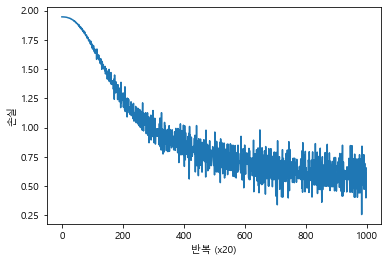

In [13]:
# 시각화
trainer.plot()

In [14]:
# W_in : 인스턴스 변수에 단어의 분산 표현
word_vecs = model.word_vec   
for word_id, word in id_to_word.items():
    print('%10s : '%word, word_vecs[word_id])

       you :  [-1.2040207 -1.1085966 -1.1441324 -1.2306142  1.0948557]
       say :  [ 1.1897193   1.1755065   1.2011646   0.06393065 -1.186283  ]
   goodbye :  [-0.66440064 -0.7722215  -0.7221421  -0.78250855  0.84478545]
       and :  [ 1.0234092  1.0128498  1.0287957  1.8882514 -1.0086005]
         i :  [-0.65444505 -0.76132435 -0.70808357 -0.77366066  0.83747214]
     hello :  [-1.2042432 -1.1320168 -1.1445017 -1.2260792  1.1131704]
         . :  [ 0.9798501  1.0093713  0.9943258 -1.6760046 -1.0240512]


### 예측 및 정확도 평가

In [15]:
# 예측
h = model.predict(contexts)
print(h,h.shape)  # (6,7)
print('예측값:',np.argmax(h,axis=1))
print('실제값:',np.argmax(target,axis=1))

[[7.65471434e-03 7.18641379e-01 3.14727039e-04 2.61460340e-01
  3.14748884e-04 3.98624344e-03 7.62784746e-03]
 [1.17381381e-02 8.44069173e-05 4.65690508e-01 2.60539171e-04
  4.66533233e-01 4.39610151e-02 1.17321598e-02]
 [1.85119322e-02 6.50877697e-01 1.51317611e-03 2.98481504e-01
  1.51160052e-03 1.06655387e-02 1.84385507e-02]
 [1.17381381e-02 8.44069173e-05 4.65690508e-01 2.60539171e-04
  4.66533233e-01 4.39610151e-02 1.17321598e-02]
 [7.74008219e-03 7.17926365e-01 3.19021249e-04 2.62024671e-01
  3.18986766e-04 3.95879866e-03 7.71207457e-03]
 [1.77810667e-03 3.53745325e-04 4.32219684e-02 6.39823042e-04
  4.43472369e-02 9.07946652e-01 1.71246795e-03]] (6, 7)
예측값: [1 4 1 4 1 5]
실제값: [1 2 3 4 1 5]


In [16]:
# 정확도
preds = np.argmax(h,1)
t = np.argmax(target,1)
print('target :',t)
print('predict:',preds)
accuracy = np.sum(np.equal(preds,t))/len(t)
print('정확도:', np.round(accuracy,4))

target : [1 2 3 4 1 5]
predict: [1 4 1 4 1 5]
정확도: 0.6667


In [17]:
for idx in range(len(t)):
    print(id_to_word[t[idx]], ' : ', id_to_word[preds[idx]])

say  :  say
goodbye  :  i
and  :  say
i  :  i
say  :  say
hello  :  hello
